# Tagger

In [1]:
import nltk
from nltk import word_tokenize
%matplotlib inline

In [2]:
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [3]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [4]:
text.similar('bought')

made said done put had seen found given left heard was been brought
set got that took in told felt


In [5]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


# Tagged Corpora

In [6]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [7]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [8]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [9]:
nltk.corpus.sinica_treebank.tagged_words()

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

# Universal Part-of-Speech Tagset

|Tag|Meaning|English Examples|
|---|-------|----------------|
|ADJ|adjective|new, good, high, special, big, local|
|ADP|adposition|on, of, at, with, by, into, under|
|ADV|adverb|really, already, still, early, now|
|CONJ|conjunction|and, or, but, if, while, although|
|DET|determiner, article|the, a, some, most, every, no, which|
|NOUN|noun|year, home, costs, time, Africa|
|NUM|numeral|twenty-four, fourth, 1991, 14:24|
|PRT|particle|at, on, out, over per, that, up, with|
|PRON|pronoun|he, their, her, its, my, I, us|
|VERB|verb|is, say, told, given, playing, would|
|.|punctuation marks|. , ; !|
|X|other|ersatz, esprit, dunno, gr8, univeristy|

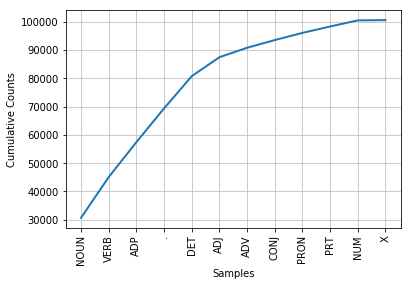

In [13]:
from nltk.corpus import brown
from IPython.display import display, Image
brown_news_tagged = brown.tagged_words(categories='news',tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.plot(cumulative=True)

# Nouns
Nouns generally refer to people, places, things, or concepts, e.g.: woman, Scotland, book, intelligence. Nouns can appear after determiners and adjectives, and can be the subject or object of the verb

|Word|After a determiner|Subject of the verb|
|----|------------------|-------------------|
|woman|the woman who I saw yesterday ...|the woman sat down|
|Scotland|the Scotland I remember as a child ...|Scotland has five million people|
|book|the book I bought yesterday ...|this book recounts the colonization of Australia|
|intelligence|the intelligence displayed by the child ...|Mary's intelligence impressed her teachers|

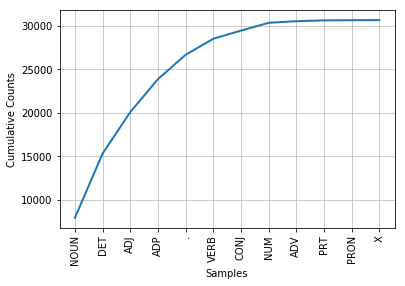

In [14]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a,b) in word_tag_pairs if b[1]=='NOUN']
fdist = nltk.FreqDist(noun_preceders)
fdist.plot(cumulative=True)

# Verbs
erbs are words that describe events and actions. In the context of a sentence, verbs typically express a relation involving the referents of one or more noun phrases.

In [25]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
print([wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB'][:20])

['is', 'said', 'was', 'are', 'be', 'has', 'have', 'will', 'says', 'would', 'were', 'had', 'been', 'could', "'s", 'can', 'do', 'say', 'make', 'may']


In [29]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [34]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
print(list(cfd2['VBN'])[:30])

['named', 'used', 'caused', 'exposed', 'reported', 'replaced', 'sold', 'died', 'expected', 'diagnosed', 'studied', 'industrialized', 'owned', 'found', 'classified', 'rejected', 'outlawed', 'imported', 'tracked', 'thought', 'considered', 'elected', 'based', 'lifted', 'ensnarled', 'voted', 'been', 'held', 'banned', 'renovated']


# Exploring Tagged Corpora

In [40]:
# words follow 'often'
brown_learned_text = brown.words(categories='learned')
print(sorted(set(b for (a,b) in nltk.bigrams(brown_learned_text) if a == 'often')))

[',', '.', 'accomplished', 'analytically', 'appear', 'apt', 'associated', 'assuming', 'became', 'become', 'been', 'began', 'call', 'called', 'carefully', 'chose', 'classified', 'colorful', 'composed', 'contain', 'differed', 'difficult', 'encountered', 'enough', 'equate', 'extremely', 'found', 'happens', 'have', 'ignored', 'in', 'involved', 'more', 'needed', 'nightly', 'observed', 'of', 'on', 'out', 'quite', 'represent', 'responsible', 'revamped', 'seclude', 'set', 'shortened', 'sing', 'sounded', 'stated', 'still', 'sung', 'supported', 'than', 'to', 'when', 'work']


In [41]:
brown_lrnd_tagged = brown.tagged_words(categories='learned',tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0]=='often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [48]:
# explore "<Verb> to <Verb>" sequence
from nltk.corpus import brown
def process(sentence):
    for (w1,t1), (w2,t2),(w3,t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2=='TO' and t3.startswith('V')):
            print(w1, w2, w3)

for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

trying to forget
trying to acquire
threatens to linger
decided to forego
managed to hold
intended to illustrate
tried to get
learn to live
helping to move
striving to hold
choose to work
tried to see
trying to create
made to appear
failed to make
seemed to deserve
managed to mix
want to hurt
liked to nip
manages to acquire
widened to enchant
serve to contradict
dare to experiment
tried to humanize
tries to preserve
helps to rebut
seems to make
began to play
cares to remember
serve to show
want to collect
designed to invite
attempt to make
designed to belong
seem to come
wanted to identify
neglect to cultivate
chooses to lead
chosen to sing
expected to follow
formed to spur
tends to shy
seeking to become
tries to make
began to change
try to solve
formed to fill
determined to avoid
seems to work
began to fall
began to depart
refused to give
like to sniff
continue to demonstrate
begins to wilt
going to murder
trying to puzzle
expects to profit
chooses to die
wishes to pay
conditioned to e

decided to charge
decided to go
allowed to see
agreed to take
decide to send
allowed to delay
request to leave
promised to treat
declined to enter
added to reinforce
obliged to publish
continue to serve
plans to serve
Hoping to cut
obliged to announce
wish to preserve
heard to remark
hopes to redress
desires to walk
prefer to take
likes to measure
proposed to corral
intended to stay
ceased to look
manages to overlook
troubled to read
destined to go
expected to go
used to characterize
helping to raise
decided to stay
used to refer
needs to educate
tended to tamp
like to underline
begun to falter
intend to include
wish to improve
try to take
prefers to designate
want to join
seeking to increase
used to make
used to make
inclined to remain
heard to say
stopped to receive
used to describe
claimed to own
tried to find
meant to pay
given to go
wanted to make
began to gallop
attempting to lasso
failing to encircle
got to get
trying to maneuver
beginning to go
began to pull
began to draw
like 

determined to get
began to develop
continued to grow
decided to capitalize
came to favor
used to describe
began to play
gathered to hear
guaranteed to excite
invited to deliver
sent to knoe
preparing to deport
told to leave
constrained to move
refused to let
managed to get
trying to get
tending to arouse
sent to get
tried to arbitrate
tried to arbitrate
ordered to knock
refused to attend
determined to compel
refused to sanction
going to let
attempt to prorate
leaving to come
please to write
want to go
want to teach
wanted to go
tried to picture
waiting to hear
came to live
began to show
tends to weaken
seems to rise
permitted to see
continues to discuss
serve to sublimate
wanted to close
wished to keep
want to describe
began to denounce
afford to place
try to fit
decides to enter
expected to prefer
tend to bring
tend to become
tend to assimilate
tend to converge
disposed to question
forced to realize
assembled to bear
beginning to tell
hastened to dispatch
ordered to attack
going to tr

wanted to go
mean to imply
supposed to happen
learning to read
asked to describe
learning to read
expected to earn
expected to earn
surprised to find
struggle to induce
asked to learn
prefer to test
told to purchase
seemed to antagonize
designed to develop
refused to change
refused to change
refused to accept
supposed to know
working to become
led to see
asked to vote
duplicated to form
learn to play
want to change
learns to become
began to emerge
used to annoy
stooping to dispense
come to see
preferred to keep
used to give
came to feel
used to accomplish
found to match
required to store
saved to represent
saved to represent
created to accommodate
inspected to determine
used to look
serve to illustrate
intended to decrease
required to improve
italicized to guide
seems to center
operate to center
serves to focus
purport to represent
hesitates to suggest
mentioned to make
trying to develop
compelled to omit
continue to show
planning to use
expecting to recover
meant to move
preferred to 

wanted to wring
got to dancing
trying to pick
began to laugh
trying to find
going to get
want to fight
wanting to sock
trying to take
want to hear
seemed to feel
trying to help
wait to get
expect to escape
try to fathom
allowed to spend
try to make
wanted to know
tried to get
tempted to ask
decided to tell
surprised to find
wished to show
like to bring
beg to inquire
wanted to visit
like to enact
wished to create
wish to deceive
want to create
going to take
going to lose
consented to meet
rose to go
chosen to read
started to cross
seemed to think
started to undo
longed to tell
chose to read
served to increase
refused to bring
got to stop
want to take
tried to order
seeking to create
hope to accomplish
attempt to rise
tried to rise
began to crawl
failed to reach
began to creep
began to crawl
promised to take
meant to shout
longed to increase
want to begin
seemed to imply
stopped to admire
stayed to visit
want to get
tried to remember
began to riffle
promise to make
like to travel
tried 

supposed to meet
wait to get
seem to dwell
feared to dwell
tried to date
trying to cut
beginning to collect
determined to find
put to use
determined to spend
hoping to escape
pleased to note
calculated to glamorize
began to explain
want to see
wanted to turn
began to whip
failed to find
meant to save
wanted to waste
want to get
going to explode
seemed to disintegrate
intended to propitiate
embarrassing to see
going to keel
seemed to enjoy
like to know
deserve to lie
want to see
pretending to joke
used to try
trying to look
began to watch
want to go
seemed to sink
began to ooze
began to move
seemed to know
trying to talk
continued to lash
turned to look
struggled to control
deserved to live
like to hunt
left to say
like to recognize
wanting to fly
dispatched to harry
started to buckle
began to crawl
wanted to lose
going to show
going to give
trying to size
seemed to promise
hate to run
turned to face
wish to enter
intend to speak
determined to make
want to upset
resolved to make
left to

# Default Dictionaries

In [49]:
from collections import defaultdict
frequency = defaultdict(int)
frequency['colorless']=4
frequency['ideas']

0

In [52]:
pos = defaultdict(lambda: 'NOUN')
pos['colorless']='ADJ'
print(pos['blog'])
print(list(pos))

NOUN
['colorless', 'blog']


In [54]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = [word for (word,_) in vocab.most_common(1000)]
mapping = defaultdict(lambda:'UNK')
for v in v1000:
    mapping[v] = v
    
alice2 = [mapping[v] for v in alice]
print(alice2[:50])

['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'UNK', 'UNK', 'UNK', 'UNK', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'UNK', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into']


# Incrementally Updateing Dictionary

In [55]:
from collections import defaultdict
counts = defaultdict(int)
from nltk.corpus import brown
for (word, tag) in brown.tagged_words(categories='news',tagset='universal'):
    counts[tag] += 1
    
print(counts['NOUN'])
print(sorted(counts))

30654
['.', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRON', 'PRT', 'VERB', 'X']


In [58]:
## sorting dictionary by ites values
from operator import itemgetter
print(sorted(counts.items(), key=itemgetter(1), reverse=True))
print([t for t,c in sorted(counts.items(),key=itemgetter(1),reverse=True)])

[('NOUN', 30654), ('VERB', 14399), ('ADP', 12355), ('.', 11928), ('DET', 11389), ('ADJ', 6706), ('ADV', 3349), ('CONJ', 2717), ('PRON', 2535), ('PRT', 2264), ('NUM', 2166), ('X', 92)]
['NOUN', 'VERB', 'ADP', '.', 'DET', 'ADJ', 'ADV', 'CONJ', 'PRON', 'PRT', 'NUM', 'X']


In [59]:
pair = ('NP', 8336)
print(pair[1])
print(itemgetter(1)(pair))

8336
8336


idiom of updating dictionary
``` {python}
>>> my_dictionary = defaultdict(function to create default value)
>>> for item in sequence:
...      my_dictionary[item_key] is updated with information about item
```

In [62]:
last_letters = defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
    key = word[-2:]
    last_letters[key].append(word)
    
print(last_letters['ly'][:10])
print(last_letters['zy'][:10])

['abactinally', 'abandonedly', 'abasedly', 'abashedly', 'abashlessly', 'abbreviately', 'abdominally', 'abhorrently', 'abidingly', 'abiogenetically']
['blazy', 'bleezy', 'blowzy', 'boozy', 'breezy', 'bronzy', 'buzzy', 'Chazy', 'cozy', 'crazy']


In [63]:
anagrams = defaultdict(list)
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)
    
print(anagrams['aeilnrt'])

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']


In [74]:
anagrams = nltk.Index((''.join(sorted(w)),w) for w in words)
print(anagrams['aeilnrt'])

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']


nltk.Index is a defaultdict(list) with extra support for initialization. Similarly, nltk.FreqDist is essentially a defaultdict(int) with extra support for initialization (along with sorting and plotting methods).

# Complex keys and values

In [77]:
# A POS tagger could use such information to decide that the word right, 
# when preceded by a determiner, should be tagged as  ADJ.
pos = defaultdict(lambda: defaultdict(int))
brown_news_tagged = brown.tagged_words(categories='news',tagset='universal')
for ((w1,t1),(w2,t2)) in nltk.bigrams(brown_news_tagged):
    pos[(t1,w2)][t2] += 1
    
print(pos[('DET','right')])

defaultdict(<class 'int'>, {'NOUN': 5, 'ADJ': 11})


## Python dictionary summary
|Example|Description|
|-------|-----------|
|d = {}|create an empty dictionary and assign it to d|
|d[key] = value|assign a value to a given dictionary key|
|d.keys()|the list of keys of the dictionary|
|list(d)|the list of keys of the dictionary|
|sorted(d)|the keys of the dictionary, sorted|
|key in d|test whether a particular key is in the dictionary|
|for key in d|iterate over the keys of the dictionary|
|d.values()|the list of values in the dictionary|
|dict([(k1,v1), (k2,v2), ...])|create a dictionary from a list of key-value pairs|
|d1.update(d2)|add all items from d2 to d1|
|defaultdict(int)|a dictionary whose default value i|

# Automatic Tagging

In [95]:
from nltk.corpus import brown
brown.tagged_sents(categories='news')

TypeError: 'ConcatenatedCorpusView' object is not callable

In [2]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

## The default tagger

In [3]:
# a tagger that tags everything as NN
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
print(default_tagger.tag(tokens))
print(default_tagger.evaluate(brown_tagged_sents))

[('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('green', 'NN'), ('eggs', 'NN'), ('and', 'NN'), ('ham', 'NN'), (',', 'NN'), ('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('them', 'NN'), ('Sam', 'NN'), ('I', 'NN'), ('am', 'NN'), ('!', 'NN')]
0.13089484257215028


## The Regular Expression Tagger

In [4]:
patterns = [
(r'.*ing$', 'VBG'),               # gerunds
(r'.*ed$', 'VBD'),                # simple past
(r'.*es$', 'VBZ'),                # 3rd singular present
(r'.*ould$', 'MD'),               # modals
(r'.*\'s$', 'NN$'),               # possessive nouns
(r'.*s$', 'NNS'),                 # plural nouns
(r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
(r'.*', 'NN')                     # nouns (default)
]

Note that these are processed in order, and the first one that matches is applied

In [6]:
regexp_tagger = nltk.RegexpTagger(patterns)
print(regexp_tagger.tag(brown_sents[3]))

[('``', 'NN'), ('Only', 'NN'), ('a', 'NN'), ('relative', 'NN'), ('handful', 'NN'), ('of', 'NN'), ('such', 'NN'), ('reports', 'NNS'), ('was', 'NNS'), ('received', 'VBD'), ("''", 'NN'), (',', 'NN'), ('the', 'NN'), ('jury', 'NN'), ('said', 'NN'), (',', 'NN'), ('``', 'NN'), ('considering', 'VBG'), ('the', 'NN'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'NN'), ('the', 'NN'), ('election', 'NN'), (',', 'NN'), ('the', 'NN'), ('number', 'NN'), ('of', 'NN'), ('voters', 'NNS'), ('and', 'NN'), ('the', 'NN'), ('size', 'NN'), ('of', 'NN'), ('this', 'NNS'), ('city', 'NN'), ("''", 'NN'), ('.', 'NN')]


In [7]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

## Lookup Tagger

In [10]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word,cfd[word].max()) for (word,_) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [19]:
sent = brown.sents(categories='news')[3]
print(baseline_tagger.tag(sent))

[('``', '``'), ('Only', None), ('a', 'AT'), ('relative', None), ('handful', None), ('of', 'IN'), ('such', None), ('reports', None), ('was', 'BEDZ'), ('received', None), ("''", "''"), (',', ','), ('the', 'AT'), ('jury', None), ('said', 'VBD'), (',', ','), ('``', '``'), ('considering', None), ('the', 'AT'), ('widespread', None), ('interest', None), ('in', 'IN'), ('the', 'AT'), ('election', None), (',', ','), ('the', 'AT'), ('number', None), ('of', 'IN'), ('voters', None), ('and', 'CC'), ('the', 'AT'), ('size', None), ('of', 'IN'), ('this', 'DT'), ('city', None), ("''", "''"), ('.', '.')]


Many words are assigned to a tag of None because they are not among the 100 most frequent words.
we can use a backoff to assign a default tagger

In [20]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags, backoff=nltk.DefaultTagger('NN'))

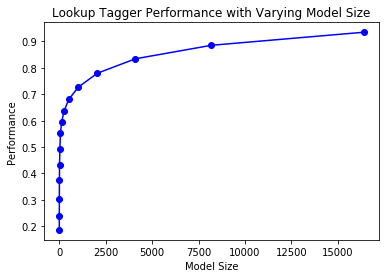

In [21]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

display()

# N-Gram Tagging

## Unigram Tagging

In [22]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [24]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

## General N-gram Tagging
An n-gram tagger is a generalization of a unigram tagger whose context is the current word together with the part-of-speech tags of the n-1 preceding tokens. The tag to be chosen, tn, is circled, and the context is shaded in grey.

![n-gram_tagger](http://www.nltk.org/images/tag-context.png)

In [26]:
size = int(len(brown_tagged_sents)*0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]

bigram_tagger = nltk.BigramTagger(train_sents)
print(bigram_tagger.tag(brown_sents[2007]))

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'CS'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]


In [29]:
unseen_sent = brown_sents[4203]
print(bigram_tagger.tag(unseen_sent))

[('The', 'AT'), ('population', 'NN'), ('of', 'IN'), ('the', 'AT'), ('Congo', 'NP'), ('is', 'BEZ'), ('13.5', None), ('million', None), (',', None), ('divided', None), ('into', None), ('at', None), ('least', None), ('seven', None), ('major', None), ('``', None), ('culture', None), ('clusters', None), ("''", None), ('and', None), ('innumerable', None), ('tribes', None), ('speaking', None), ('400', None), ('separate', None), ('dialects', None), ('.', None)]


In [30]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

Notice that the bigram tagger manages to tag every word in a sentence it saw during training, but does badly on an unseen sentence. As soon as it encounters a new word (i.e., 13.5), it is unable to assign a tag. It cannot tag the following word (i.e., million) even if it was seen during training, simply because it never saw it during training with a None tag on the previous word. Consequently, the tagger fails to tag the rest of the sentence. Its overall accuracy score is very low

## Combining Taggers
- Try tagging the token with the bigram tagger.
- If the bigram tagger is unable to find a tag for the token, try the unigram tagger.
- If the unigram tagger is also unable to find a tag, use a default tagger.

In [31]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents,backoff=t0)
t2 = nltk.BigramTagger(train_sents,backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

## Storing Taggers

In [34]:
from pickle import dump
output = open('t2.pkl','wb')
dump(t2,output,-1)
output.close()

In [35]:
from pickle import load
input = open('t2.pkl','rb')
tagger = load(input)
input.close()

In [36]:
text = """The board's action shows what free enterprise
            is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]

## Perfomance Limitations
What is the upper limit to the performance of an n-gram tagger

In [38]:
cfd = nltk.ConditionalFreqDist(
            ((x[1], y[1], z[0]), z[1])
            for sent in brown_tagged_sents
            for x, y, z in nltk.trigrams(sent))
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

0.049297702068029296

In [47]:
test_tags = [tag for sent in brown.sents(categories='editorial')
                for (word, tag) in t2.tag(sent)]
gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]
print(nltk.ConfusionMatrix(gold_tags,test_tags))

           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## Transformation-Based Tagging
A potential issue with n-gram taggers is the size of their n-gram table (or language model).
Brill tagging is a kind of transformation-based learning, named after its inventor. The general idea is very simple: guess the tag of each word, then go back and fix the mistakes. In this way, a Brill tagger successively transforms a bad tagging of a text into a better one.

An example:
The President said he will ask Congress to increase grants to states for vocational rehabilitation.

We will examine the operation of two rules: (a) Replace NN with VB when the previous word is TO; (b) Replace TO with IN when the next tag is NNS. 6.1 illustrates this process, first tagging with the unigram tagger, then applying the rules to fix the errors.

Steps in Brill Tagging:

|Phrase|to|increase|grants|to|states|for|vocational|rehabilitation|
|------|----------------------------------------------------------|
|Unigram|TO|NN|NNS|TO|NNS|IN|JJ|NN|
|Rule 1| |VB| | | | | | |
|Rule 2| | | |IN| | | | 
|Output|TO|VB|NNS|IN|NNS|IN|JJ|NN|
|Gold|TO|VB|NNS|IN|NNS|IN|JJ|NN|